In [1]:
import torch
torch.cuda.empty_cache()  

In [2]:
# pip install geoplot
import geoplot

In [3]:
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.0.1+cu117
Torchvision version: 0.15.2+cu117
CUDA is available: True


In [4]:
#pip install folium

In [5]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:100000"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
os.getcwd()

'/home/yelhe/script/mt'

In [6]:
import glob
import shapely
from shapely.geometry import Point, Polygon
import shapely.plotting
import pandas as pd
from PIL import Image as ima
import warnings
from pathlib import Path
import pandas as pd
import pyproj
import shapefile as shp
import seaborn as sns
import geopandas as gpd
import folium

In [7]:
import scipy

In [8]:
# # read the dataset and extract location
# df_raw = pd.read_excel('/home/yelhe/data/Acc/E_Trottis_Unfallbericht_2019-2022.xlsx',sheet_name=None)

In [9]:
# koord = df_raw['Allgemeine Angaben'][['Unfall-Nr.','Koord E', 'Koord N']]

In [10]:
koord = pd.read_csv('/home/yelhe/script/mt/output/koord.csv')

In [11]:
koord = koord.drop(['url1', 'url2', 'url3', 'url4'], axis = 1)

In [12]:
koord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Koord E  350 non-null    int64  
 1   Koord N  350 non-null    int64  
 2   lon      350 non-null    float64
 3   lat      350 non-null    float64
 4   Nr       350 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 13.8 KB


In [17]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(koord['lon'], koord['lat'])]
geodata=gpd.GeoDataFrame(koord, crs=crs, geometry=geometry)

/home/yelhe/.local/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [15]:
# # Pseudo points
# crs={'init':'epsg:4326'}
# koord_rp = pd.read_csv('/home/yelhe/script/mt/output/rp_koord.csv')
# geometry_rp=[Point(xy) for xy in zip(koord_rp['lon'], koord_rp['lat'])]
# geodata_rp = gpd.GeoDataFrame(koord_rp, crs=crs, geometry=geometry_rp)

In [16]:
# geodata.to_file('/home/yelhe/script/mt/output/koord.geojson', driver='GeoJSON')  

In [38]:
zur = gpd.read_file('/home/yelhe/data/geodata/cityzurich.shp')

In [15]:
dz = gpd.read_file('/home/yelhe/data/geodata/differ_zur.shp')

<Projected CRS: EPSG:2056>
Name: CH1903+ / LV95
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Liechtenstein; Switzerland.
- bounds: (5.96, 45.82, 10.49, 47.81)
Coordinate Operation:
- name: Swiss Oblique Mercator 1995
- method: Hotine Oblique Mercator (variant B)
Datum: CH1903+
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [52]:
zur = zur.to_crs(img.crs)
dz = dz.to_crs(img.crs)

In [48]:
zur.crs

<Bound CRS: +proj=merc +a=6378137.0 +b=6378137.0 +nadgrids=@nu ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown to WGS84
- method: NTv2
Datum: unknown using nadgrids=@null
- Ellipsoid: unknown
- Prime Meridian: Greenwich
Source CRS: unknown

In [53]:
geodata.to_crs(img.crs)

,Koord E,Koord N,lon,lat,Nr,geometry
0,2678534,1249396,8.478805,47.390709,99900060852597,POINT (943856.230 6006082.625)
1,2678534,1251496,8.479174,47.409596,99900063018611,POINT (943897.283 6009188.659)
2,2678561,1249232,8.479134,47.389231,99900052723510,POINT (943892.829 6005839.575)
3,2678640,1250202,8.480350,47.397946,99900061514043,POINT (944028.275 6007272.541)
4,2678733,1251201,8.481758,47.406919,99900063037843,POINT (944184.979 6008748.361)
...,...,...,...,...,...,...
345,2686563,1250608,8.585369,47.400603,99900055905276,POINT (955718.874 6007709.612)
346,2686780,1250693,8.588260,47.401339,99900060670975,POINT (956040.676 6007830.635)
347,2687008,1250881,8.591316,47.403000,99900047367168,POINT (956380.937 6008103.756)
348,2687022,1250538,8.591435,47.399913,99900050714619,POINT (956394.150 6007596.131)


In [17]:
ch = gpd.read_file('/home/yelhe/data/ch/Stadtkreis.shp')

<Projected CRS: EPSG:2056>
Name: CH1903+ / LV95
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Liechtenstein; Switzerland.
- bounds: (5.96, 45.82, 10.49, 47.81)
Coordinate Operation:
- name: Swiss Oblique Mercator 1995
- method: Hotine Oblique Mercator (variant B)
Datum: CH1903+
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [18]:
ch = ch.to_crs(epsg=4326)

Text(32.347222222222214, 0.5, 'Latitude')

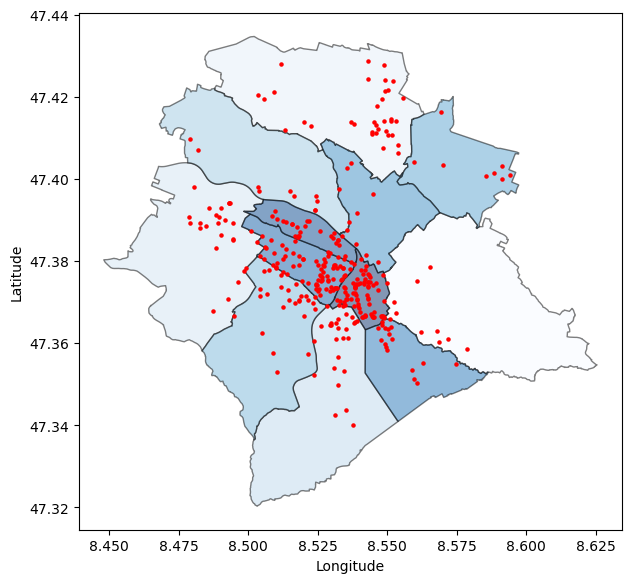

In [20]:
fig, ax = plt.subplots(figsize=(7,7))
ch.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha = 0.5,linewidth=1,cmap="Blues")

geodata.plot(ax=ax, color='red', markersize=5);

# fig.suptitle('Random locations', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')

<Axes: xlabel='lon', ylabel='lat'>

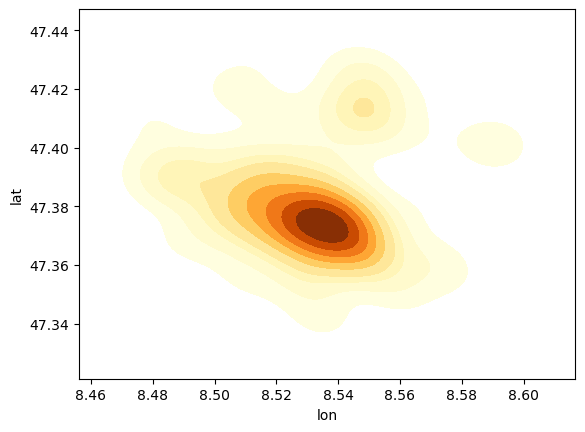

In [23]:
sns.kdeplot(data = geodata, x = 'lon', y = 'lat',
            cmap = 'YlOrBr', bw_method = 'scott',
            fill = True)

In [24]:
coo = np.vstack([geodata['lon'],geodata['lat']])

In [130]:
# coo

In [38]:
kernal = scipy.stats.gaussian_kde(coo, bw_method = 'scott')

In [40]:
f = kernal.covariance_factor()
print(f)

0.3766939622519034


In [42]:
bw = f * coo.std()

In [43]:
print(bw)

7.317241903723931


In [113]:
# import pylab

In [35]:
bw = kernal.set_bandwidth('scott')

In [37]:
print(bw)

None


<Axes: xlabel='lon', ylabel='lat'>

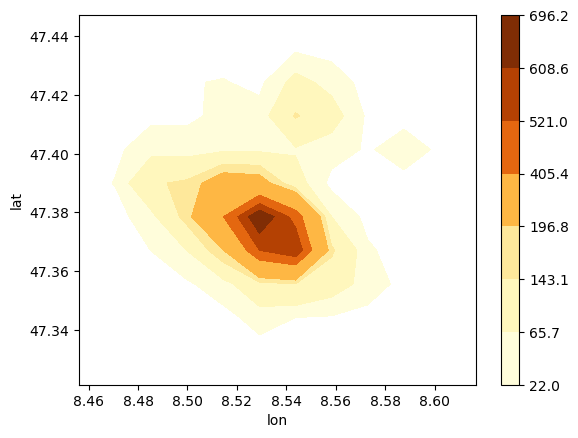

In [65]:
sns.kdeplot(data = geodata, x = 'lon', y = 'lat',
            cmap = 'YlOrBr', bw_method = 'scott',
            fill = True, levels = 8, gridsize = 12,  cbar = True)

In [25]:
import cartopy

In [26]:
from cartopy.io.img_tiles import OSM
import cartopy.crs as ccrs

In [ ]:
# Original
# import os
# import cartopy.crs as ccrs
# from math import floor
# import matplotlib.pyplot as plt
# from matplotlib import patheffects
# import matplotlib
# if os.name == 'nt':
#     matplotlib.rc('font', family='Arial')
# else:  # might need tweaking, must support black triangle for N arrow
#     matplotlib.rc('font', family='DejaVu Sans')


# def utm_from_lon(lon):
#     """
#     utm_from_lon - UTM zone for a longitude

#     Not right for some polar regions (Norway, Svalbard, Antartica)

#     :param float lon: longitude
#     :return: UTM zone number
#     :rtype: int
#     """
#     return floor( ( lon + 180 ) / 6) + 1

# def scale_bar(ax, proj, length, location=(0.5, 0.05), linewidth=3,
#               units='km', m_per_unit=1000):
#     """

#     http://stackoverflow.com/a/35705477/1072212
#     ax is the axes to draw the scalebar on.
#     proj is the projection the axes are in
#     location is center of the scalebar in axis coordinates ie. 0.5 is the middle of the plot
#     length is the length of the scalebar in km.
#     linewidth is the thickness of the scalebar.
#     units is the name of the unit
#     m_per_unit is the number of meters in a unit
#     """
#     # find lat/lon center to find best UTM zone
#     x0, x1, y0, y1 = ax.get_extent(proj.as_geodetic())
#     # Projection in metres
#     utm = ccrs.UTM(utm_from_lon((x0+x1)/2))
#     # Get the extent of the plotted area in coordinates in metres
#     x0, x1, y0, y1 = ax.get_extent(utm)
#     # Turn the specified scalebar location into coordinates in metres
#     sbcx, sbcy = x0 + (x1 - x0) * location[0], y0 + (y1 - y0) * location[1]
#     # Generate the x coordinate for the ends of the scalebar
#     bar_xs = [sbcx - length * m_per_unit/2, sbcx + length * m_per_unit/2]
#     # buffer for scalebar
#     buffer = [patheffects.withStroke(linewidth=5, foreground="w")]
#     # Plot the scalebar with buffer
#     ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k',
#         linewidth=linewidth, path_effects=buffer)
#     # buffer for text
#     buffer = [patheffects.withStroke(linewidth=3, foreground="w")]
#     # Plot the scalebar label
#     t0 = ax.text(sbcx, sbcy, str(length) + ' ' + units, transform=utm,
#         horizontalalignment='center', verticalalignment='bottom',
#         path_effects=buffer, zorder=2)
#     left = x0+(x1-x0)*0.05
#     # Plot the N arrow
#     t1 = ax.text(left, sbcy, u'\u25B2\nN', transform=utm,
#         horizontalalignment='center', verticalalignment='bottom',
#         path_effects=buffer, zorder=2)
#     # Plot the scalebar without buffer, in case covered by text buffer
#     ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k',
#         linewidth=linewidth, zorder=3)

# if __name__ == '__main__':

#     ax = plt.axes(projection=ccrs.Mercator())
#     plt.title('Cyprus')
#     ax.set_extent([31, 35.5, 34, 36], ccrs.Geodetic())
#     ax.stock_img()
#     ax.coastlines(resolution='10m')

#     scale_bar(ax, ccrs.Mercator(), 100)  # 100 km scale bar
#     # or to use m instead of km
#     # scale_bar(ax, ccrs.Mercator(), 100000, m_per_unit=1, units='m')
#     # or to use miles instead of km
#     # scale_bar(ax, ccrs.Mercator(), 60, m_per_unit=1609.34, units='miles')

#     plt.show()

/home/yelhe/.local/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:790: UserWarning: Approximating coordinate system <Geographic 2D CRS: GEOGCRS["unknown",DATUM["Unknown based on WGS 84 e ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '


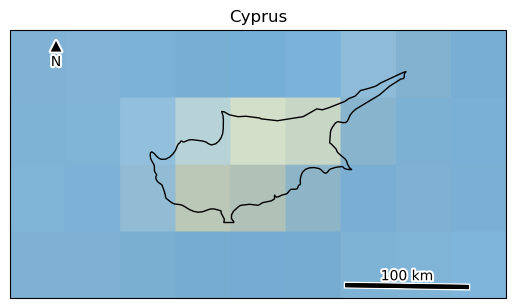

In [105]:
import os
import cartopy.crs as ccrs
from math import floor
import matplotlib.pyplot as plt
from matplotlib import patheffects
import matplotlib
if os.name == 'nt':
    matplotlib.rc('font', family='Arial')
else:  # might need tweaking, must support black triangle for N arrow
    matplotlib.rc('font', family='DejaVu Sans')


def utm_from_lon(lon):
    """
    utm_from_lon - UTM zone for a longitude

    Not right for some polar regions (Norway, Svalbard, Antartica)

    :param float lon: longitude
    :return: UTM zone number
    :rtype: int
    """
    return floor( ( lon + 180 ) / 6) + 1

def scale_bar(ax, proj, length, location=(0.5, 0.05), linewidth=3,
              units='km', m_per_unit=1000):
    """

    http://stackoverflow.com/a/35705477/1072212
    ax is the axes to draw the scalebar on.
    proj is the projection the axes are in
    location is center of the scalebar in axis coordinates ie. 0.5 is the middle of the plot
    length is the length of the scalebar in km.
    linewidth is the thickness of the scalebar.
    units is the name of the unit
    m_per_unit is the number of meters in a unit
    """
    # find lat/lon center to find best UTM zone
    x0, x1, y0, y1 = ax.get_extent(proj.as_geodetic())
    # Projection in metres
    utm = ccrs.UTM(utm_from_lon((x0+x1)/2))
    # Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(utm)
    # Turn the specified scalebar location into coordinates in metres
    sbcx, sbcy = x0 + (x1 - x0) * location[0], y0 + (y1 - y0) * location[1]
    # Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbcx - length * m_per_unit/2 + 0.3*(x1-x0), 
              sbcx + length * m_per_unit/2 + 0.3*(x1-x0)]
    # buffer for scalebar
    buffer = [patheffects.withStroke(linewidth=5, foreground="w")]
    # Plot the scalebar with buffer
    ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k',
        linewidth=linewidth, path_effects=buffer)
    # buffer for text
    buffer = [patheffects.withStroke(linewidth=3, foreground="w")]
    # Plot the scalebar label
    t0 = ax.text(sbcx + 0.3*(x1-x0), sbcy + 0.01*(y1-y0), str(length) + ' ' + units, transform=utm,
        horizontalalignment='center', verticalalignment='bottom',
        path_effects=buffer, zorder=2)
    left = x0+(x1-x0)*0.1
    # Plot the N arrow
    t1 = ax.text(left, sbcy + 0.8*(y1-y0), u'\u25B2\nN', transform=utm,
        horizontalalignment='center', verticalalignment='bottom',
        path_effects=buffer, zorder=2)
    # Plot the scalebar without buffer, in case covered by text buffer
    ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k',
        linewidth=linewidth, zorder=3)

if __name__ == '__main__':

    ax = plt.axes(projection=ccrs.Mercator())
    plt.title('Cyprus')
    ax.set_extent([31, 35.5, 34, 36], ccrs.Geodetic())
    ax.stock_img()
    ax.coastlines(resolution='10m')

    scale_bar(ax, ccrs.Mercator(), 100)  # 100 km scale bar
    # or to use m instead of km
    # scale_bar(ax, ccrs.Mercator(), 100000, m_per_unit=1, units='m')
    # or to use miles instead of km
    # scale_bar(ax, ccrs.Mercator(), 60, m_per_unit=1609.34, units='miles')

    plt.show()

/home/yelhe/.local/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:790: UserWarning: Approximating coordinate system <Geographic 3D CRS: GEOGCRS["unknown",DATUM["Unknown based on WGS 84 e ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '


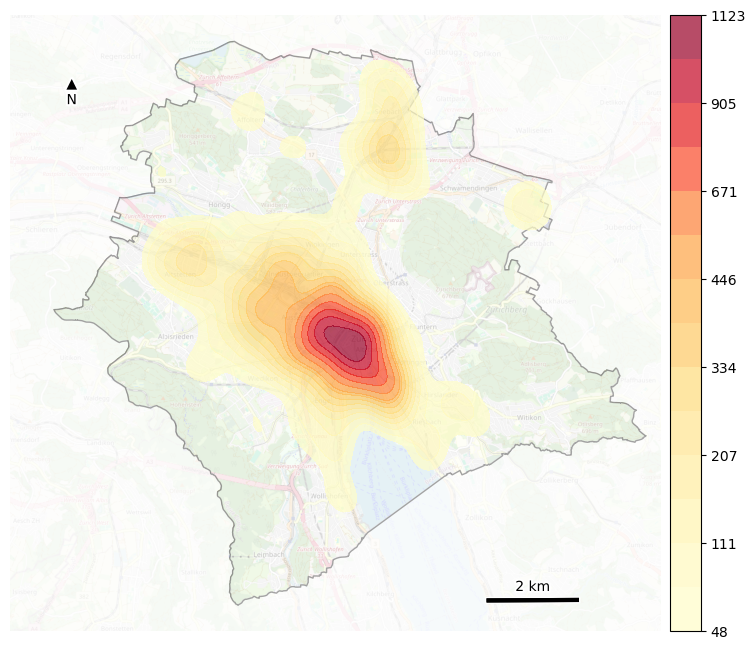

In [223]:
plt.figure(figsize = (12,8))
img = OSM()
ax = plt.axes(projection = img.crs)
# print(img.crs)
ax.add_image(img, 13)
ax.set_extent([8.435, 8.630, 47.315, 47.44])
# geodata.plot(ax=ax, color = 'grey', markersize = 3, transform = ccrs.PlateCarree())
dz.plot(ax = ax, facecolor = 'white', alpha = 0.9, linewidth = 0.5)
zur.plot(ax = ax, facecolor = 'white', alpha = 0.7, linewidth = 1, edgecolor = 'grey')
sns.kdeplot(geodata, x = 'lon', y =  'lat',
            cmap = 'YlOrRd', bw_method = 'scott', alpha = 0.7,
            fill = True, levels = 15, cbar = True, cbar_kws = {"pad":0.01},
            thresh = 0.1, bw_adjust = 0.6, # previously is levels 10, no thresh or adjust
            transform = ccrs.PlateCarree(), ax = ax)
# cbar = fig.colorbar()
# cbar.set_label('denesity', fontsize = 10, labelpad = 10)
scale_bar(ax, ccrs.PlateCarree(), 2)
plt.box(False)
plt.savefig('kde5.png', dpi = 300, edgecolor = None, 
             transparent = True, bbox_inches = 'tight')
# 'YlOrBr'

In [94]:
img.crs

/home/yelhe/.local/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


<Bound CRS: +proj=merc +a=6378137.0 +b=6378137.0 +nadgrids=@nu ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown to WGS84
- method: NTv2
Datum: unknown using nadgrids=@null
- Ellipsoid: unknown
- Prime Meridian: Greenwich
Source CRS: unknown

In [ ]:
ch.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha = 0.5,linewidth=1,cmap="Blues")

geodata.plot(ax=ax, color='red', markersize=5);

In [132]:
koord

,Koord E,Koord N,lon,lat,Nr
0,2678534,1249396,8.478805,47.390709,99900060852597
1,2678534,1251496,8.479174,47.409596,99900063018611
2,2678561,1249232,8.479134,47.389231,99900052723510
3,2678640,1250202,8.480350,47.397946,99900061514043
4,2678733,1251201,8.481758,47.406919,99900063037843
...,...,...,...,...,...
345,2686563,1250608,8.585369,47.400603,99900055905276
346,2686780,1250693,8.588260,47.401339,99900060670975
347,2687008,1250881,8.591316,47.403000,99900047367168
348,2687022,1250538,8.591435,47.399913,99900050714619


In [133]:
raw = pd.read_csv('/home/yelhe/script/mt/dataraw/dfaa.csv')

In [136]:
atime

,Nr,Datum,Zeit
0,99900060852597,2022-05-29 00:00:00,00:10
1,99900063018611,2022-10-12 00:00:00,17:40
2,99900052723510,2020-10-26 00:00:00,16:50
3,99900061514043,2022-07-08 00:00:00,21:30
4,99900063037843,2022-10-13 00:00:00,19:40
...,...,...,...
345,99900055905276,2021-06-08 00:00:00,12:50
346,99900060670975,2022-05-16 00:00:00,14:42
347,99900047367168,2019-09-21 00:00:00,13:49
348,99900050714619,2020-06-06 00:00:00,16:37


In [151]:
atime = raw[['Nr', 'Datum', 'Zeit']]
atime.loc[:, 'Date'] = pd.to_datetime(atime.loc[:, 'Datum'], format = "%Y-%m-%d",
                                       errors='coerce')

/sctmp/yelhe/ipykernel_737797/982669855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atime.loc[:, 'Date'] = pd.to_datetime(atime.loc[:, 'Datum'], format = "%Y-%m-%d",


In [152]:
atime['Date'].dtype

dtype('<M8[ns]')

In [153]:
atime.loc[:,'year'] = atime.loc[:,'Date'].dt.year
atime.loc[:,'month'] = atime.loc[:,'Date'].dt.month
atime.loc[:,'day'] = atime.loc[:,'Date'].dt.day
atime.loc[:,'week'] = atime.loc[:,'Date'].dt.isocalendar().week

/sctmp/yelhe/ipykernel_737797/3630136309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atime.loc[:,'year'] = atime.loc[:,'Date'].dt.year
/sctmp/yelhe/ipykernel_737797/3630136309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atime.loc[:,'month'] = atime.loc[:,'Date'].dt.month
/sctmp/yelhe/ipykernel_737797/3630136309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [154]:
atime

,Nr,Datum,Zeit,Date,year,month,day,week
0,99900060852597,2022-05-29,00:10,2022-05-29,2022,5,29,21
1,99900063018611,2022-10-12,17:40,2022-10-12,2022,10,12,41
2,99900052723510,2020-10-26,16:50,2020-10-26,2020,10,26,44
3,99900061514043,2022-07-08,21:30,2022-07-08,2022,7,8,27
4,99900063037843,2022-10-13,19:40,2022-10-13,2022,10,13,41
...,...,...,...,...,...,...,...,...
345,99900055905276,2021-06-08,12:50,2021-06-08,2021,6,8,23
346,99900060670975,2022-05-16,14:42,2022-05-16,2022,5,16,20
347,99900047367168,2019-09-21,13:49,2019-09-21,2019,9,21,38
348,99900050714619,2020-06-06,16:37,2020-06-06,2020,6,6,23


In [155]:
atime.groupby(['year']).size().reset_index().rename(columns={0:'count'})

,year,count
0,2019,48
1,2020,74
2,2021,91
3,2022,137


In [156]:
# atime.to_csv('/home/yelhe/script/mt/output/accidenttime.csv', index = False)

In [158]:
geodata.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Koord E   350 non-null    int64   
 1   Koord N   350 non-null    int64   
 2   lon       350 non-null    float64 
 3   lat       350 non-null    float64 
 4   Nr        350 non-null    int64   
 5   geometry  350 non-null    geometry
dtypes: float64(2), geometry(1), int64(3)
memory usage: 16.5 KB


In [159]:
geodatatime = pd.merge(geodata, atime, on = ['Nr'])

In [160]:
geodatatime.to_csv('/home/yelhe/script/mt/output/accidenttimegeo.csv', index = False)

In [162]:
at = geodatatime.copy(deep = 'True')
at19 = at.loc[at['year'] == 2019]
at20 = at.loc[at['year'] == 2020]
at21 = at.loc[at['year'] == 2021]
at22 = at.loc[at['year'] == 2022]

In [163]:
print(at19.shape, at20.shape, at21.shape, at22.shape)

(48, 13) (74, 13) (91, 13) (137, 13)


/home/yelhe/.local/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:790: UserWarning: Approximating coordinate system <Geographic 3D CRS: GEOGCRS["unknown",DATUM["Unknown based on WGS 84 e ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '


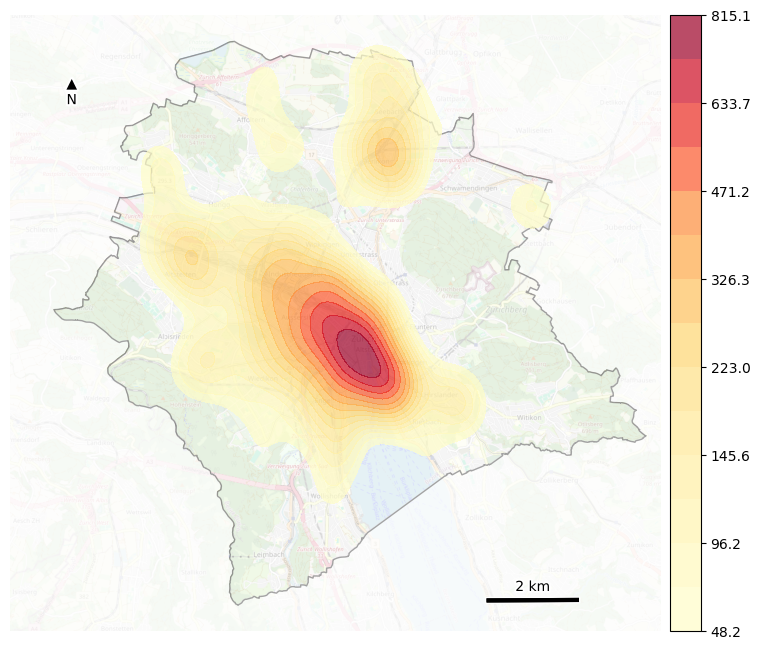

In [227]:
plt.figure(figsize = (12,8))
img = OSM()
ax = plt.axes(projection = img.crs)
# print(img.crs)
ax.add_image(img, 13)
ax.set_extent([8.435, 8.630, 47.315, 47.44])
# at19.plot(ax=ax, color = 'grey', markersize = 3, transform = ccrs.PlateCarree())
dz.plot(ax = ax, facecolor = 'white', alpha = 0.9, linewidth = 0.5)
zur.plot(ax = ax, facecolor = 'white', alpha = 0.7, linewidth = 1, edgecolor = 'grey')
sns.kdeplot(at22, x = 'lon', y =  'lat',
            cmap = 'YlOrRd', bw_method = 'scott', alpha = 0.7,
            fill = True, levels = 15, cbar = True, cbar_kws = {"pad":0.01},
            thresh = 0.1, bw_adjust = 0.6,
            transform = ccrs.PlateCarree(), ax = ax)
# cbar = fig.colorbar()
# cbar.set_label('denesity', fontsize = 10, labelpad = 10)
scale_bar(ax, ccrs.PlateCarree(), 2)
plt.box(False)
plt.savefig('kde2022_.png', dpi = 300, edgecolor = None, 
             transparent = True, bbox_inches = 'tight')
# 'YlOrBr'

In [228]:
# road segment counts
rc = gpd.read_file('/home/yelhe/data/geodata/rscount.shp')

In [231]:
rc = rc.drop(['fid', 'id1', 'velo', 'velostreif', 'veloweg', 'einbahn', 'fuss',
       'name', 'map_velo', 'map_fuss', 'se_anno_ca', 'objectid', 'LENGTH',
       'STRASS_ID', 'RICHTPLANT', 'STRADATNAM', 'UNTERHALT', 'EIGENTUM',
       'STRASSTYP', 'UREG_TEXT', 'JAHR', 'SREG_TEXT', 'SHAPE_LEN', 'id1_2',
       'kategorie', 'objectid_2'], axis = 1)

In [232]:
rc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18078 entries, 0 to 18077
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   idyl        18078 non-null  int64   
 1   roadsegmen  18078 non-null  int64   
 2   geometry    18078 non-null  geometry
dtypes: geometry(1), int64(2)
memory usage: 423.8 KB
